In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d

plt.rcParams["figure.figsize"] = [8,8]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,arange,array,linspace,meshgrid

%matplotlib inline

# Uncomment the one that corresponds to your Jupyter theme
# plt.style.use('default')
plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


<p style="padding-bottom:40%;"> </p>

# One-minute Review

The **linearization** of a differentiable function $f(x,y,z)$ about a point $(a,b,c)$ is the linear function $$L(x,y,z) = f(a,b,c) + f_x(a,b,c)(x-a) + f_y(a,b,c)(y-b) + f_z(a,b,c)(z-c).$$

Its graph is tangent to the graph of $f$. 

[Tangents demo](https://drew.youngren.nyc/3Demos/fxy/)

<p style="padding-bottom:40%;"> </p>

# Lecture 10

  - Objectives
    - Compute derivatives of compositions.
    - Compute derivatives from implicit relations.
    
  - Resources
    - Content
      - Stewart: §14.5
      - New Strang: [§4.5](https://cnx.org/contents/oxzXkyFi@6.1:8QoqMp7K@7/4-5-The-Chain-Rule)

    - Practice
      - Mooculus: [Chain Rule](https://ximera.osu.edu/mooculus/calculus3/directionalDerivativeAndChainRule/digInChainRule)
    - Extras
      - CalcBLUE: WARNING! This is very matrix-dependent (and thus extra) [The Chain Rule](https://youtu.be/3WtjD3bewBk) 

## Theorem of Differentiability

If all partial derivatives $\frac{\partial f}{\partial x_i}$ are continuous in a neighborhood of a point $P$, then $f$ is differentiable at $P$. 

#### Nonexample

Consider $$f(x,y) = \frac{xy}{\sqrt{x^2 + y^2}}.$$

In [2]:
@interact(angle=(-114,18,6))
def _(angle=-30):
    plt.figure(figsize=(7,7),dpi=100)
    x = y = np.linspace(-1,1,100)
    x,y = np.meshgrid(x,y)
    ax = plt.gca(projection='3d')
    ax.view_init(30,angle)
    ax.plot_surface(x,y,x*y/(sqrt(x**2 + y**2)),cmap='viridis',alpha=.5)
    # ax.contour(x,y,x*y/(sqrt(x**2 + y**2)))
    ax.contour(x,y,x*y/(sqrt(x**2 + y**2)),zdir='x',cmap='gray_r')
    ax.contour(x,y,x*y/(sqrt(x**2 + y**2)),zdir='y',cmap='gray');

interactive(children=(IntSlider(value=-30, description='angle', max=18, min=-114, step=6), Output()), _dom_cla…

\begin{align*}
f_{x} &= \frac{y}{\sqrt{x^2 + y^2}} - \frac{x^2y}{(x^2 +y^2)^{3/2}} \\
\end{align*}

are not continuous near the origin.

<p style="padding-bottom:40%;"> </p>

# The Chain Rule

Start by recalling the 1-D chain rule $$(f\circ g)'(x) = f'(g(x))g'(x)$$

or if $u=g(x)$, $$ \frac{df}{dx} = \frac{df}{du}\frac{du}{dx}$$ where the derivatives are evaluated at the appropriate point.

<p style="padding-bottom:40%;"> </p>

## The main problem

Suppose a hiking party charts a route on a map given by $\langle x(t),y(t) \rangle$ where the altitude is given by a function $f(x,y)$.

What is $\frac{df}{dt}$ at a given time $t_0$?

In [3]:
f = lambda x,y: exp(-4*(y-sin(x))**2)*(1-np.abs(x+pi/2)/5)

@interact
def _(func=fixed(f),angle=(-90,120,6),vangle=(0,90,6),pt=(1,98)):
    pt = 99-pt
    fig = plt.figure(figsize = (10,5),dpi=100)
    ax = fig.add_subplot(121,projection='3d')
    ax.view_init(vangle,angle)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    x =  np.linspace(-4,4,601)
    y =  np.linspace(-2,2,301)    
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
    ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=100,ccount=100);
    t = np.linspace(-pi/2,pi/2,100)
    X = t
    Y = t/pi - 1/2 - t*(t**2-pi**2/4)/5
    Z = func(X,Y)
    ax.plot(X,Y,Z,lw=6,color='r',alpha=1)
    ax2 = fig.add_subplot(122)
    ax2.plot((pi/2-t)/pi*4,Z)
    ax2.set_xlabel("$t$",size=16)
    ax2.set_ylabel("$z$",size=16)
    dt = t[pt+1]-t[pt-1]
    dx = X[pt+1]-X[pt-1]
    dy = Y[pt+1]-Y[pt-1]
    dz = Z[pt+1]-Z[pt-1]
    s = np.linspace(-20,20,100)
    ax.plot(X[pt] + dx*s,Y[pt] + dy*s,Z[pt] + dz*s,lw=4)
    ax.set_zlim3d([0,1])
    ax2.plot((pi/2-t)/pi*4,dz/dt*(t-t[pt])+Z[pt])
    ax2.set_ylim([0,1])

interactive(children=(IntSlider(value=12, description='angle', max=120, min=-90, step=6), IntSlider(value=42, …

##### Clue: replace $f$ with $L$

In [4]:
@interact
def _(angle=(-100,14,6)):
    fig = plt.figure(figsize=(6,6),dpi=100)
    ax = fig.add_subplot(111,projection='3d')
    x = y = np.linspace(0,2,75)
    x,y = np.meshgrid(x,y)
    ax.view_init(30,angle)
    for c in 'xyz':
    #         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    ax.plot_surface(x,y,-(x-2)**2 - (y-2)**2/2,alpha=.5)
    ax.plot_surface(x,y,2*(x-1) + (y-1) -3/2,alpha=.5)
    t = np.linspace(0,2,50)
    ax.plot(t,t,-(t-2)**2 - (t-2)**2/2)
    ax.plot(t,t,2*(t-1) + (t-1) - 3/2);

interactive(children=(IntSlider(value=-46, description='angle', max=14, min=-100, step=6), Output()), _dom_cla…

<p style="padding-bottom:40%;"> </p>

That is, linearize $f$ around the point $(a,b) = (x(t_0),y(t_0))$.

$$\frac{d}{dt} f(x(t),y(t)) = \frac{d}{dt} L(x(t),y(t))$$

$$= \frac{d}{dt} \left( f(a,b) + f_x(a,b)(x(t)-a) + f_y(a,b)(y(t) - b)\right)$$

$$= f_x(a,b) x'(t) + f_y(a,b) y'(t)$$

$$= \frac{\partial f}{\partial x}\frac{dx}{dt} + \frac{\partial f}{\partial y}\frac{dy}{dt}$$ where, again, we're careful to evaluate the partials at the appropriate point.

<p style="padding-bottom:40%;"> </p>

# The Chain Rule

If $f(x_1,\ldots,x_n)$ is differentiable at $\vec x_0 = \langle x_1(t_0),\ldots,x_n(t_0) \rangle$ and each $x_i$ is differentiable at $t_0$, then 

$$ \frac {df}{dt}\Big|_{t_0} = \sum_{i=1}^n \frac{\partial f}{\partial x_i}\Big|_{\vec x_0}\frac{dx_i}{dt}\Big|_{t_0} $$

<p style="padding-bottom:40%;"> </p>

#### Definition

This is more easily expressed using the **gradient** vector of a function $$\nabla f = \begin{bmatrix} f_{x_1} \\ f_{x_2} \\ \vdots \\ f_{x_n} \end{bmatrix}$$

*There will be **much** more to say about this later; for now, just treat it as notation.*

Thus for differetiable functions $f:\RR^n\to \RR$ and $\vec r: \RR \to \RR^n$, the composition has derivative $$\frac{d}{dt} f(\vec r(t)) = \nabla f(\vec r(t))\cdot \vec r'(t).$$

<p style="padding-bottom:40%;"> </p>

## Other forms

Other cases can be handled by extrapolating from the case above. 

$$\frac{\partial}{\partial t} f(x(s,t),y(s,t),z(s,t)) = \frac{\partial f}{\partial x} \frac{\partial x}{\partial t} + \frac{\partial f}{\partial y}\frac{\partial y}{\partial t} +\frac{\partial f}{\partial z}\frac{\partial z}{\partial t} $$


<p style="padding-bottom:40%;"> </p>

### Example

A particle circles the $z$-axis every second at a distance of 1 unit. If it is confined to the surface $z=xy$, find the maximum of $\frac{dz}{dt}$.

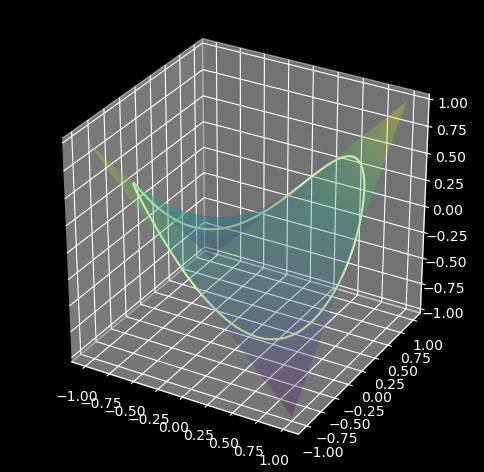

In [5]:
fig = plt.figure(figsize=(6,6),dpi=100)
ax = fig.gca(projection='3d')
x = y = np.linspace(-1,1,100)
x,y = np.meshgrid(x,y)
ax.plot_surface(x,y,x*y,cmap='viridis',alpha=.3);
t = np.linspace(-pi,pi,100)
ax.plot(cos(t),sin(t),1/2*sin(2*t));

Note the period is 1 second, so $x = \cos(2\pi t), y = \sin (2\pi t)$. 

$$ \frac{dz}{dt} = \frac{\partial z}{\partial x}\frac{dx}{dt} + \frac{\partial z}{\partial y}\frac{dy}{dt} $$

$$ = y (-2\pi\sin (2\pi t)) + x(2\pi \cos(2\pi t)) $$

$$ = -2\pi\sin^2 (2\pi t) + 2\pi \cos^2(2\pi t) $$

$$ = 2\pi \cos(4\pi t) $$ which has a maximum of $2\pi$.

<p style="padding-bottom:40%;"> </p>

### Example

The base radius of a right cone is increasing at a rate of  1 cm/min, and its height is decreasing at 2cm/min. When the base has radius 4 cm and the height is 8 cm, is the volume increasing or decreasing?

In [6]:
@interact
def _(angle=(-100,14,6),dt=(-.5,.5,.05)):
    fig = plt.figure(figsize=(6,6),dpi=100)
    ax = fig.add_subplot(111,projection='3d')
    r = np.linspace(0,4+dt,75)
    t = np.linspace(0,2*np.pi,75)
    r,t = np.meshgrid(r,t)
    ax.view_init(30,angle)
    for c in 'xyz':
    #         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    ax.plot_surface(r*cos(t),r*sin(t),-2*dt+8 - r*(-2*dt+8)/(dt+4),alpha=.5)
    ax.set_xlim((-5,5))
    ax.set_ylim((-5,5))
    ax.set_zlim((0,10))
    ax.plot([4+dt,0,0],[0,0,0],[0,0,8-dt*2],'k',lw=2)

interactive(children=(IntSlider(value=-46, description='angle', max=14, min=-100, step=6), FloatSlider(value=0…

<p style="padding-bottom:40%;"> </p>

## Example

Suppose $f(x,y)$ has continuous derivatives of all order. Express $\frac{\partial^2 f}{\partial r\partial \theta}$ in terms of the partial derivatives of $f$. 

$r$ and $\theta$ are the usual polar coordinates.

$$\frac{\partial f}{\partial r} = f_x  \frac{\partial x}{\partial r} + f_y \frac{\partial y}{\partial r}$$

$$ = f_x \cos \theta + f_y \sin \theta $$

$$\frac{\partial^2 f}{\partial \theta \partial r } = \left(f_{xx} \frac{\partial x}{\partial \theta} + f_{xy} \frac{\partial y}{\partial \theta}\right)\cos \theta - f_x \sin \theta + \left(f_{yx} \frac{\partial x}{\partial \theta} + f_{yy} \frac{\partial y}{\partial \theta}\right)\sin \theta + f_y \cos \theta $$

$$ = (f_{yy} - f_{xx})r\sin\theta \cos \theta + f_{xy} r \cos (2\theta) + f_y \cos \theta - f_x \sin\theta$$

<p style="padding-bottom:40%;"> </p>

### Exercises

  1. Wheat production $W$ in a given year depends on the average temperature $T$ and the annual rainfall $R$. Scientists estimate that the average temperature is rising at a rate of $0.15^\circ$C/year and rainfall is decreasing at a rate of $0.1$ cm/year. They also estimate that at current production levels, $\partial W/\partial T = -2$ and $\partial W/\partial R = 8$. 

    1. What is the significance of the signs of these partial derivatives?
  
    1. Estimate the current rate of change of wheat production, $dW/dt$.


<p style="padding-bottom:40%;"> </p>

  2. Suppose 
\begin{align} 
z &= z(x,y) \\
x &= x(u,v) \\
y &= y(u,v) \\
u &= u(s,t) \\
v &= v(s,t) \\
\end{align}
are all differentiable. Find an expression for $\frac{\partial z}{\partial s}$.

$$ \frac{\partial z}{\partial s} = \frac{\partial z}{\partial x}\frac{\partial x}{\partial u}\frac{\partial u}{\partial s}
+ \frac{\partial z}{\partial x}\frac{\partial x}{\partial v}\frac{\partial v}{\partial s}
+ \frac{\partial z}{\partial y}\frac{\partial y}{\partial u}\frac{\partial u}{\partial s}
+ \frac{\partial z}{\partial y}\frac{\partial y}{\partial v}\frac{\partial v}{\partial s} $$

<p style="padding-bottom:40%;"> </p>

## Example

If $g:\RR\to\RR$ is any smooth function, show that $f(x,y) = g(x^2+y^2)$ is radially symmetric. That is, $\frac{\partial f}{\partial \theta} =0$

$$\frac{\partial f }{\partial \theta} = \frac{\partial}{\partial x} (g(x^2 + y^2)) \frac{\partial x}{\partial \theta} 
+ \frac{\partial}{\partial y} (g(x^2 + y^2)) \frac{\partial y}{\partial \theta} $$

$$ = g'(x^2 + y^2)2x (-r \sin \theta) + g'(x^2 + y^2)2y (-r \cos \theta) $$

$$ = g'(x^2 + y^2)( -2xy + 2yx) = 0 $$

<p style="padding-bottom:40%;"> </p>

# Implicit differentiation

Every implicit relationship among variables $x$ and $y$ can be expressed as a level set $$ F(x,y) = c. $$

To find the rate of change $\frac{dy}{dx}$ determined by this relation, we can be clever and differentiate the whole expression with respect to $x$. 

$$ \frac{d}{dx}F(x,y) = 0$$

<p style="padding-bottom:40%;"> </p>

**WARNING** Mind your $d$'s and $\partial$'s.

$$ \frac{d}{dx}F(x,y(x)) = 0$$

$$ \frac{\partial F}{\partial x}\frac{dx}{dx} + \frac{\partial F}{\partial y}\frac{dy}{dx} = 0$$

$$ \frac{dy}{dx} = -\frac{F_x}{F_y}$$

<p style="padding-bottom:40%;"> </p>

## Example

Find the slope of the tangent line to  

$$ x \sin(y) - \frac12 = \sqrt{2} - 2\cos(xy)$$ at the point $\left(\frac12,\frac\pi2\right)$.

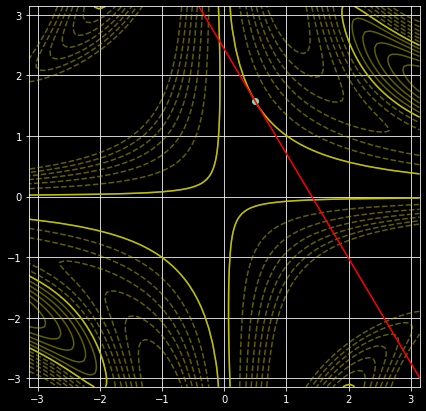

In [8]:
x = y = np.linspace(-pi,pi,102)
x,y = np.meshgrid(x,y)
z = x*sin(y) + 2*cos(x*y) - sqrt(2) - 1/2
plt.figure(figsize=(7,7))

cp = plt.contour(x,y,z,levels=arange(-3,3.4,.5),alpha=.5,colors='y')

cp = plt.contour(x,y,z,levels=[0],colors='y')
# plt.clabel(cp,fmt="%d");
x = np.linspace(-2.5,3.5,102)
plt.plot(x,pi/2 + (x-1/2) * (sqrt(2) - pi),color='r',lw=3);
plt.grid(True)
plt.scatter(1/2,pi/2)
plt.xlim(-pi,pi)
plt.ylim(-pi,pi);

<p style="padding-bottom:40%;"> </p>

$$F(x,y) = x \sin y + 2\cos(xy) = \frac12 + \sqrt 2 $$

$$ \frac{dy}{dx} = \left.-\frac{F_x}{F_y} \right\rvert_{(1/2,\pi/2)} = \left.-\frac{\sin y -2\sin(xy)y}{x\cos y -2 \sin(xy)x}\right\rvert_{(1/2,\pi/2)} $$

$$ = - \frac{1 - \frac{\pi}{\sqrt2}}{-\frac{1}{\sqrt2}} = \sqrt2 - \pi $$

<p style="padding-bottom:40%;"> </p>